# Logistic Regression

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Auto complete

%config IPCompleter.greedy=True

In [16]:
#Importing datasets
dataset = pd.read_csv('Logistic_Regression/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:, 4].values

print("Dataset size", len(dataset))
dataset.head()

Dataset size 400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Splitting the dataset into the Training and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [4]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

pd.DataFrame(X_train).head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584


In [5]:
# Fitting model
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
# Predicting test set results
Y_pred = model.predict(X_test)


In [7]:
# Making confusion matrix
confusion_matrix(Y_test, Y_pred)

array([[63,  5],
       [ 7, 25]])

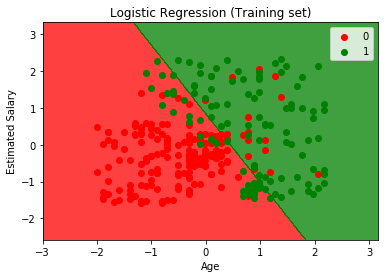

In [14]:
# Visualising the Training set results
X_set, Y_set = X_train, Y_train

# Creating coordinate matrix
X1, X2 =  np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() +1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step = 0.01))

# Getting transposed matrix
transposed = np.array([X1.ravel(),X2.ravel()]).T

#predicting
transposed_pred = model.predict(transposed)
Z = transposed_pred.reshape(X1.shape)

# Drawing contour
plt.contourf(X1, X2, Z, 2, alpha = 0.75, cmap = ListedColormap(('red','green')))

# Setting contour limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting scatter plot
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
                c = ListedColormap(('red','green'))(i), label = j)
    
# Description
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

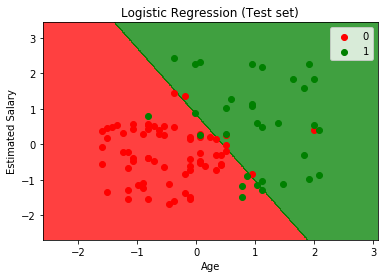

In [10]:
# Visualising the Training set results
X_set, Y_set = X_test, Y_test

# Creating coordinate matrix
X1, X2 =  np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() +1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step = 0.01))

# Getting transposed matrix
transposed = np.array([X1.ravel(),X2.ravel()]).T

#predicting
transposed_pred = model.predict(transposed)
Z = transposed_pred.reshape(X1.shape)

# Drawing contour
plt.contourf(X1, X2, Z, 2, alpha = 0.75, cmap = ListedColormap(('red','green')))

# Setting contour limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting scatter plot
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
                c = ListedColormap(('red','green'))(i), label = j)
    
# Description
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()